# news (KPTimes Dataset)

https://www.aclweb.org/anthology/W19-8617/

Data from:
https://github.com/ygorg/KPTimes

In [1]:
%pylab inline
import pandas as pd
from clustering import *
import glob
import json


plt.rcParams.update({
    "figure.dpi": 100,
    "figure.figsize": (4, 3),
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 1,
    "lines.marker": "",
    "lines.markersize": 8,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 8,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 8,
    "xtick.major.size": 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 8,
    
    "text.color": "grey",
    "text.usetex": False
})

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jameshoughton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
files = glob.glob('~/Desktop/keyword_data/KPTimes/KPTimes.*.jsonl')
collector = []
for file in files:
    with open(file, 'r') as f:
        s = f.readline()
        while len(s)>0:
            collector.append(json.loads(s))
            s = f.readline()
            
KPTimes = pd.DataFrame(collector)
KPTimes["keys"] = KPTimes['keyword'].apply(clean)
KPTimes

,id,categories,date,title,abstract,keyword,keys
0,ny0125215,"[sports, tennis]",2012/08/28,Jack Sock Picks Up Where He Left Off at Last Y...,When we last saw Jack Sock at the United State...,Tennis;United States Open (Tennis);Sock Jack,"[tennis, sockjack, unitedstatesopentennis]"
1,ny0164463,"[business, media]",2006/11/13,Two Long-Established Marketers Loosen Up,Two big advertisers known for the traditional ...,Advertising and Marketing;General Electric Co;...,"[television, advertisingmarketing, generalelec..."
2,ny0225732,"[world, asia]",2010/10/17,Japan Goes From Dynamic to Disheartened,"OSAKA, Japan — Like many members of Japan ’s m...",Japan;Deflation (Economics);Economic Condition...,"[deflationeconomics, japan, economicconditions..."
3,ny0044192,[technology],2014/05/22,EBay Urges New Passwords After Breach,SAN FRANCISCO — In the latest prominent breach...,eBay;Hacker (computer security),"[hackercomputersecurity, ebay]"
4,ny0079517,"[world, americas]",2015/02/17,Honduras: Police at U.S. Embassy Are Suspended...,Twenty-one police officers assigned to the Uni...,"Drug cartel;Police Brutality,Police Misconduct...","[miguelvallevalle, honduras, drugabuse, corrup..."
...,...,...,...,...,...,...,...
289918,ny0267811,[nyregion],2016/03/12,"A Reluctant Barkeep, Mourned on the Brooklyn S...",The thing about Sunny Balzano was you couldn’t...,Antonio Balzano;Red Hook Brooklyn;Sunny's Bar ...,"[sunnysbarbrooklynny, barsnightclubs, antoniob..."
289919,ny0138821,"[sports, football]",2008/02/03,"1972 Dolphins: Undefeated on Field, Undeterred...","MIAMI — Dick Anderson made $38,000 as a Pro Bo...",Miami Dolphins;Football;Don Shula;Bob Griese,"[bobgriese, shula, football, miamidolphins]"
289920,ny0040207,[business],2014/04/01,Justices Seem Wary of Software Patent Case,WASHINGTON — In a case with the potential to r...,Inventions and Patents;Computers and the Inter...,"[supremecourtscotus, alicecorp, techindustry, ..."
289921,ny0214221,"[world, middleeast]",2010/03/07,U.S. Enriches Companies Defying Its Policy on ...,The federal government has awarded more than $...,Iran;Sanctions;US Foreign Policy;US Politics;R...,"[halliburton, sanctions, petrobras, mazdamotor..."


In [6]:
keycounts = Counter()
for i, row in KPTimes.iterrows():
    for c in row['categories']:
        keycounts[c] += 1
    
keycounts.most_common(50)

[('sports', 66844),
 ('world', 57564),
 ('business', 55836),
 ('us', 44114),
 ('nyregion', 43221),
 ('asia', 16218),
 ('politics', 15094),
 ('europe', 14630),
 ('baseball', 12754),
 ('middleeast', 12338),
 ('technology', 9634),
 ('media', 9427),
 ('football', 8209),
 ('science', 7419),
 ('basketball', 7023),
 ('global', 5762),
 ('soccer', 5254),
 ('africa', 5203),
 ('americas', 4801),
 ('hockey', 4323),
 ('ncaabasketball', 4011),
 ('dealbook', 3815),
 ('tennis', 3520),
 ('national', 3513),
 ('golf', 3471),
 ('economy', 3186),
 ('ncaafootball', 3180),
 ('olympics', 2439),
 ('international', 2431),
 ('personaltech', 2314),
 ('worldbusiness', 1896),
 ('nyregionspecial2', 1645),
 ('energy-environment', 1481),
 ('autoracing', 1439),
 ('othersports', 1384),
 ('asia-pacific', 1226),
 ('thecity', 1112),
 ('earth', 936),
 ('cycling', 911),
 ('politics-diplomacy-world', 729),
 ('space', 715),
 ('corporate-business', 633),
 ('yourmoney', 622),
 ('smallbusiness', 604),
 ('politics-diplomacy', 534)

In [7]:
threshold = 3000
def choose_category(categories):
    if len(categories) > 1:
        s = pd.Series(index=categories, data=[keycounts[c] for c in categories])
        if min(s) < threshold:
            return s.index[s.argmax()]
        else:
            s = s[s>threshold]
            return s.index[s.argmin()]
    else:
        return categories[0]

KPTimes['single_category'] = KPTimes['categories'].apply(choose_category)
KPTimes

,id,categories,date,title,abstract,keyword,keys,single_category
0,ny0125215,"[sports, tennis]",2012/08/28,Jack Sock Picks Up Where He Left Off at Last Y...,When we last saw Jack Sock at the United State...,Tennis;United States Open (Tennis);Sock Jack,"[tennis, sockjack, unitedstatesopentennis]",tennis
1,ny0164463,"[business, media]",2006/11/13,Two Long-Established Marketers Loosen Up,Two big advertisers known for the traditional ...,Advertising and Marketing;General Electric Co;...,"[television, advertisingmarketing, generalelec...",media
2,ny0225732,"[world, asia]",2010/10/17,Japan Goes From Dynamic to Disheartened,"OSAKA, Japan — Like many members of Japan ’s m...",Japan;Deflation (Economics);Economic Condition...,"[deflationeconomics, japan, economicconditions...",asia
3,ny0044192,[technology],2014/05/22,EBay Urges New Passwords After Breach,SAN FRANCISCO — In the latest prominent breach...,eBay;Hacker (computer security),"[hackercomputersecurity, ebay]",technology
4,ny0079517,"[world, americas]",2015/02/17,Honduras: Police at U.S. Embassy Are Suspended...,Twenty-one police officers assigned to the Uni...,"Drug cartel;Police Brutality,Police Misconduct...","[miguelvallevalle, honduras, drugabuse, corrup...",americas
...,...,...,...,...,...,...,...,...
289918,ny0267811,[nyregion],2016/03/12,"A Reluctant Barkeep, Mourned on the Brooklyn S...",The thing about Sunny Balzano was you couldn’t...,Antonio Balzano;Red Hook Brooklyn;Sunny's Bar ...,"[sunnysbarbrooklynny, barsnightclubs, antoniob...",nyregion
289919,ny0138821,"[sports, football]",2008/02/03,"1972 Dolphins: Undefeated on Field, Undeterred...","MIAMI — Dick Anderson made $38,000 as a Pro Bo...",Miami Dolphins;Football;Don Shula;Bob Griese,"[bobgriese, shula, football, miamidolphins]",football
289920,ny0040207,[business],2014/04/01,Justices Seem Wary of Software Patent Case,WASHINGTON — In a case with the potential to r...,Inventions and Patents;Computers and the Inter...,"[supremecourtscotus, alicecorp, techindustry, ...",business
289921,ny0214221,"[world, middleeast]",2010/03/07,U.S. Enriches Companies Defying Its Policy on ...,The federal government has awarded more than $...,Iran;Sanctions;US Foreign Policy;US Politics;R...,"[halliburton, sanctions, petrobras, mazdamotor...",middleeast


In [8]:
keycounts2 = Counter()
for i, row in KPTimes.iterrows():
    keycounts2[row['single_category']] += 1
keycounts2

Counter({'tennis': 3520,
         'media': 9427,
         'asia': 16218,
         'technology': 9634,
         'americas': 4801,
         'nyregion': 43221,
         'us': 29420,
         'politics': 15094,
         'baseball': 12754,
         'football': 8209,
         'business': 33686,
         'africa': 5203,
         'europe': 14630,
         'sports': 15059,
         'global': 5762,
         'soccer': 5254,
         'golf': 3471,
         'hockey': 4323,
         'middleeast': 12338,
         'science': 7419,
         'ncaafootball': 3180,
         'basketball': 7023,
         'ncaabasketball': 4011,
         'world': 4374,
         'dealbook': 3815,
         'economy': 3186,
         'asia-pacific': 1226,
         'national': 3513,
         'reference': 147,
         'general': 5})

In [12]:
single_categories = pd.Series(keycounts2)
single_categories = single_categories[single_categories>threshold]
for k, v in single_categories.sort_index().items():
    print("%s (%s)"%(k,v), end=', ')

africa (5203), americas (4801), asia (16218), baseball (12754), basketball (7023), business (33686), dealbook (3815), economy (3186), europe (14630), football (8209), global (5762), golf (3471), hockey (4323), media (9427), middleeast (12338), national (3513), ncaabasketball (4011), ncaafootball (3180), nyregion (43221), politics (15094), science (7419), soccer (5254), sports (15059), technology (9634), tennis (3520), us (29420), world (4374), 

In [ ]:
thresholds=np.arange(0, 1.01, 0.05)

data_clustering_df = pd.DataFrame()
shuffled_clustering_df = pd.DataFrame()
#node_shuffled_clustering_df = pd.DataFrame()

for category in list(single_categories.index):
    print(category)
    kw_df = KPTimes[KPTimes["single_category"]==category]
    edges = create_weighted_edgelist(kw_df, method="pairs")
    data_clustering_df[category] = compute_clusterings_by_threshold(edges, thresholds)
    
    shuffled_edges = shuffle_edgelist(edges)
    shuffled_clustering_df[category] = compute_clusterings_by_threshold(shuffled_edges, thresholds)
    
    node_shuffled_kw_df = shuffle_keywords(kw_df, n=10000)
    node_shuffled_edges = create_weighted_edgelist(node_shuffled_kw_df, method="pairs")
    node_shuffled_clustering_df[domain] = compute_clusterings_by_threshold(node_shuffled_edges, thresholds)

pd.to_pickle([data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df],
             "KPTimes_clustering_pairs.pickle")

In [16]:
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle(
             "KPTimes_clustering_pairs.pickle")

In [2]:
def plot_cluster_thresholds(data_clustering_df, shuffled_clustering_df, outfile=""):
    plt.plot([],[],'r', alpha=.6, label='Keyword Data')
    plt.plot([],[],'dimgrey', alpha=.6, label='Expected by chance')    
    plt.plot([],[],'k', alpha=1, label='"Effect Size"')    

    for col in data_clustering_df.columns:
        plt.plot(data_clustering_df.index, data_clustering_df[col] - shuffled_clustering_df[col], 
                 'k', linewidth=2)

    for col in data_clustering_df.columns:
        plt.plot(data_clustering_df.index, data_clustering_df[col], 'r', alpha=.4)

    for col in shuffled_clustering_df.columns:
        plt.plot(shuffled_clustering_df.index, shuffled_clustering_df[col], 'dimgrey', alpha=.4)      

    plt.xlabel('Top n% of Beliefs')
    plt.ylabel('Clustering Coefficient')
    plt.title('Popular news article keyword pairs form clusters')

    plt.xlabel("Top n% of keyword co-citations", fontsize=10)
    plt.ylabel("Clustering Coefficient", fontsize=10)
    plt.xticks([0, .10, .25, .50, .75, 1.00], [0, 10, 25, 50, 75, 100])

    plt.legend(framealpha=0, loc="center left", bbox_to_anchor=(.65,.5))
    plt.tight_layout()
    
    if len(outfile) > 0:
        plt.savefig(outfile)


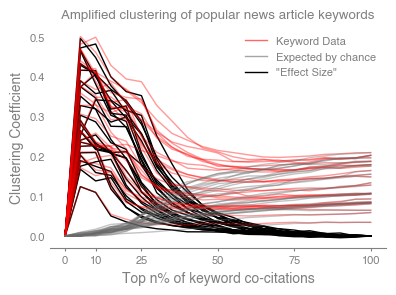

In [30]:
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle(
             "KPTimes_clustering_pairs.pickle")

#plot_cluster_thresholds(data_clustering_df, shuffled_clustering_df)
plt.plot([],[],'r', alpha=.6, label='Keyword Data')
plt.plot([],[],'dimgrey', alpha=.6, label='Expected by chance')    
plt.plot([],[],'k', alpha=1, label='"Effect Size"')    

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col] - shuffled_clustering_df[col], 
             'k', linewidth=1)

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col], 'r', alpha=.4)

for col in shuffled_clustering_df.columns:
    plt.plot(shuffled_clustering_df.index, shuffled_clustering_df[col], 'dimgrey', alpha=.4)      

plt.xlabel('Top n% of Beliefs')
plt.ylabel('Clustering Coefficient')
plt.title('Amplified clustering of popular news article keywords')

plt.xlabel("Top n% of keyword co-citations", fontsize=10)
plt.ylabel("Clustering Coefficient", fontsize=10)
plt.xticks([0, .10, .25, .50, .75, 1.00], [0, 10, 25, 50, 75, 100])

#plt.legend(framealpha=0, loc="center left", bbox_to_anchor=(.65,.5))
plt.legend(framealpha=0, loc="upper right")
plt.tight_layout()
plt.savefig('KPTimes_Pairwise_Clustering.png', dpi=300)

In [15]:
thresholds=np.arange(0, 1.01, 0.025)

data_clustering_df = pd.DataFrame()
shuffled_clustering_df = pd.DataFrame()
#node_shuffled_clustering_df = pd.DataFrame()

total_docs = 0
for category in list(single_categories.index):
    print(category)
    kw_df = KPTimes[KPTimes["single_category"]==category]
    total_docs += len(kw_df)
    edges = create_weighted_edgelist(kw_df, method="all")
    data_clustering_df[category] = compute_clusterings_by_threshold(edges, thresholds)
    
    shuffled_edges = shuffle_edgelist(edges)
    shuffled_clustering_df[category] = compute_clusterings_by_threshold(shuffled_edges, thresholds)
    
pd.to_pickle([data_clustering_df, shuffled_clustering_df, total_docs],
             "KPTimes_clustering_all.pickle")    

tennis
media
asia
technology
americas
nyregion
us
politics
baseball
football
business
africa
europe
sports
global
soccer
golf
hockey
middleeast
science
ncaafootball
basketball
ncaabasketball
world
dealbook
economy
national


In [16]:
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle(
             "KPTimes_clustering_all.pickle")    

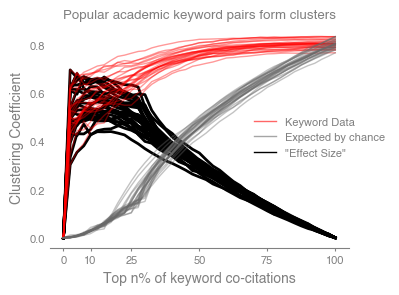

In [17]:
plot_cluster_thresholds(data_clustering_df, shuffled_clustering_df)

# single figure for both data sources
Used in supplement. Run the WOS analysis first

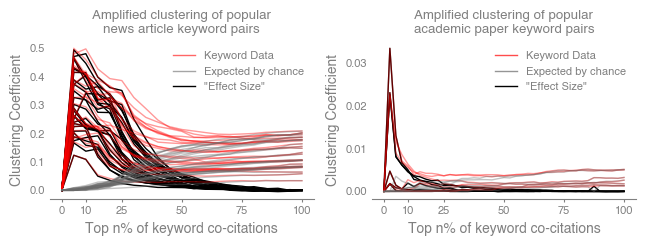

In [31]:
plt.figure(figsize=(6.5,2.5))
[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle(
             "KPTimes_clustering_pairs.pickle")

plt.subplot(1,2,1)
plt.plot([],[],'r', alpha=.6, label='Keyword Data')
plt.plot([],[],'dimgrey', alpha=.6, label='Expected by chance')    
plt.plot([],[],'k', alpha=1, label='"Effect Size"')    

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col] - shuffled_clustering_df[col], 
             'k', linewidth=1)

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col], 'r', alpha=.4)

for col in shuffled_clustering_df.columns:
    plt.plot(shuffled_clustering_df.index, shuffled_clustering_df[col], 'dimgrey', alpha=.4)      

plt.xlabel('Top n% of Beliefs')
plt.ylabel('Clustering Coefficient')
plt.title('Amplified clustering of popular\nnews article keyword pairs')

plt.xlabel("Top n% of keyword co-citations", fontsize=10)
plt.ylabel("Clustering Coefficient", fontsize=10)
plt.xticks([0, .10, .25, .50, .75, 1.00], [0, 10, 25, 50, 75, 100])

#plt.legend(framealpha=0, loc="center left", bbox_to_anchor=(.65,.5))
plt.legend(framealpha=0, loc="upper right")
plt.tight_layout()



[data_clustering_df, shuffled_clustering_df, node_shuffled_clustering_df] = pd.read_pickle("WOS_clustering_pairs.pickle")
plt.subplot(1,2,2)

 
plt.plot([],[],'r', alpha=.7, label='Keyword Data')
plt.plot([],[],'dimgrey', alpha=.7, label='Expected by chance')    
plt.plot([],[],'k', alpha=1, label='"Effect Size"')   

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col] - shuffled_clustering_df[col], 
             'k', linewidth=1)

for col in data_clustering_df.columns:
    plt.plot(data_clustering_df.index, data_clustering_df[col], 'r', alpha=.4)

for col in shuffled_clustering_df.columns:
    plt.plot(shuffled_clustering_df.index, shuffled_clustering_df[col], 'dimgrey', alpha=.4)      

plt.xlabel('Top n% of Beliefs')
plt.ylabel('Clustering Coefficient')
plt.title('Amplified clustering of popular\nacademic paper keyword pairs')

plt.xlabel("Top n% of keyword co-citations", fontsize=10)
plt.ylabel("Clustering Coefficient", fontsize=10)
plt.xticks([0, .10, .25, .50, .75, 1.00], [0, 10, 25, 50, 75, 100])

plt.legend(framealpha=0, loc="upper right")
plt.tight_layout()


plt.savefig('Pairwise_Clustering.png', dpi=300)



